In [1]:
import seaborn as sns
import pandas as pd
import plotly.express as px

In [2]:
#Read the csv file and show the data
df = pd.read_csv(r"spaceship_titanic_e.csv")
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Transported,GroupId,PassengerIdInGroup,MembersOfGroupById,Surname,MembersOfFamilyBySurname,CabinDeck,CabinNum,CabinSide,AgeBinned
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,False,1,1,1.0,Ofracculy,1.0,B,0,P,Senior
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,True,2,1,1.0,Vines,4.0,F,0,S,Young
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,False,3,1,2.0,Susent,6.0,A,0,S,Senior
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,False,3,2,2.0,Susent,6.0,A,0,S,Senior
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,True,4,1,1.0,Santantines,6.0,F,1,S,Teenager


In [4]:
#Dropping the unnecessary columns
df=df.drop(['PassengerId', 'Cabin','Name','GroupId','PassengerIdInGroup','Surname'], axis=1)

<Axes: xlabel='Transported'>

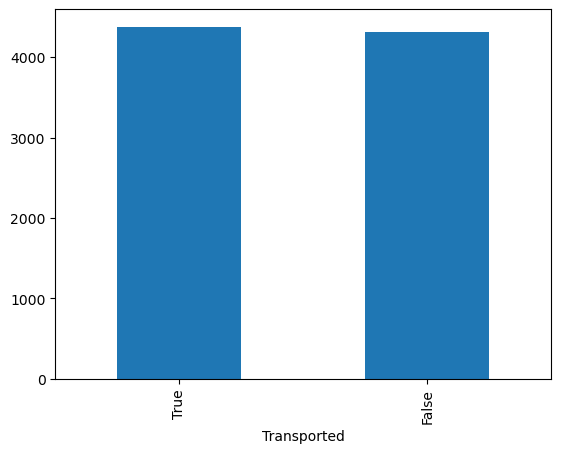

In [7]:
#Bar plot for transported column
df['Transported'].value_counts().plot(kind='bar')

<Axes: >

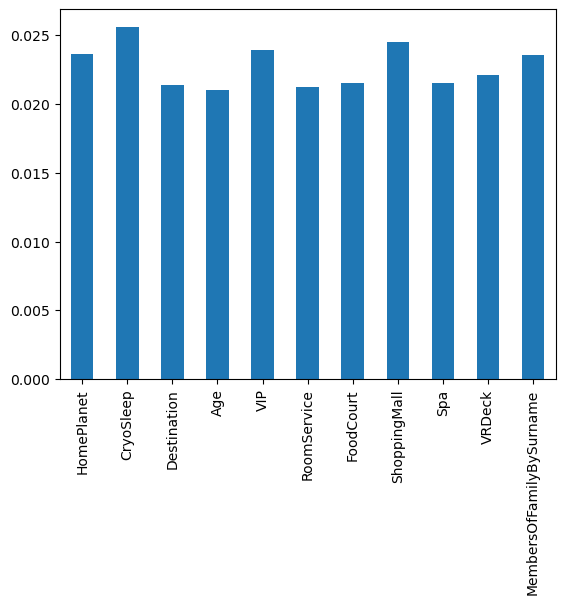

In [22]:
#Bar plot of Nan values of all columns
relativenan=df.isna().sum()/df.count()
relativenan[df.isna().sum()>0].plot(kind='bar')

In [9]:
#Box plot of age column to track outliers
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Box(
    y=df["Age"],
    name="Outliers",
    boxpoints='outliers',
    marker_color='rgb(107,174,214)',
    line_color='rgb(107,174,214)'
))
fig.show()

In [24]:
#box plot of all numerical columns to track outliers
fig = go.Figure()
fig.add_trace(go.Box(
    y=df["RoomService"],
    name="RoomService",
    boxpoints='outliers',
    marker_color='rgb(107,174,214)',
    line_color='rgb(107,174,214)'
))
fig.add_trace(go.Box(
    y=df["FoodCourt"],
    name="FoodCourt",
    boxpoints='outliers',
    marker_color='rgb(107,174,214)',
    line_color='rgb(107,174,214)'
))
fig.add_trace(go.Box(
    y=df["ShoppingMall"],
    name="ShoppingMall",
    boxpoints='outliers',
    marker_color='rgb(107,174,214)',
    line_color='rgb(107,174,214)'
))
fig.add_trace(go.Box(
    y=df["Spa"],
    name="Spa",
    boxpoints='outliers',
    marker_color='rgb(107,174,214)',
    line_color='rgb(107,174,214)'
))
fig.add_trace(go.Box(
    y=df["VRDeck"],
    name="VRDeck",
    boxpoints='outliers',
    marker_color='rgb(107,174,214)',
    line_color='rgb(107,174,214)'
))
fig.show()

In [16]:
#box plot of MembersOfGroupById and MembersOfFamilyBySurname columns to track outliers
fig = go.Figure()
fig.add_trace(go.Box(
    y=df["MembersOfGroupById"],
    name="MembersOfGroupById",
    boxpoints='outliers',
    marker_color='rgb(107,174,214)',
    line_color='rgb(107,174,214)'
))
fig.add_trace(go.Box(
    y=df["MembersOfFamilyBySurname"],
    name="MembersOfFamilyBySurname",
    boxpoints='outliers',
    marker_color='rgb(107,174,214)',
    line_color='rgb(107,174,214)'
))
fig.show()

In [18]:
#Correlation between the numerical columns
df.corr(numeric_only=True)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,MembersOfGroupById,MembersOfFamilyBySurname
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026,-0.179102,-0.133882
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611,-0.040777,-0.030852
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566,0.032632,-0.102193
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141,-0.038770,-0.038986
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131,0.019223,-0.067941
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075,0.009401,-0.074972
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000,0.082644,-0.033312
MembersOfGroupById,-0.179102,-0.040777,0.032632,-0.038770,0.019223,0.009401,0.082644,1.000000,0.343033
MembersOfFamilyBySurname,-0.133882,-0.030852,-0.102193,-0.038986,-0.067941,-0.074972,-0.033312,0.343033,1.000000


In [19]:
#Heatmap to show the correlation
fig = px.imshow(df.corr(numeric_only=True),text_auto=True)
fig.show()

<Axes: xlabel='HomePlanet'>

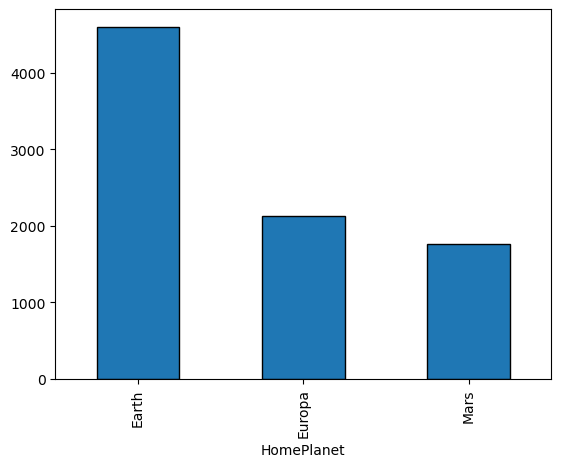

In [26]:
#Bar plot for HomePlanet column
df['HomePlanet'].value_counts().plot(kind='bar',edgecolor="black")

<Axes: xlabel='CryoSleep'>

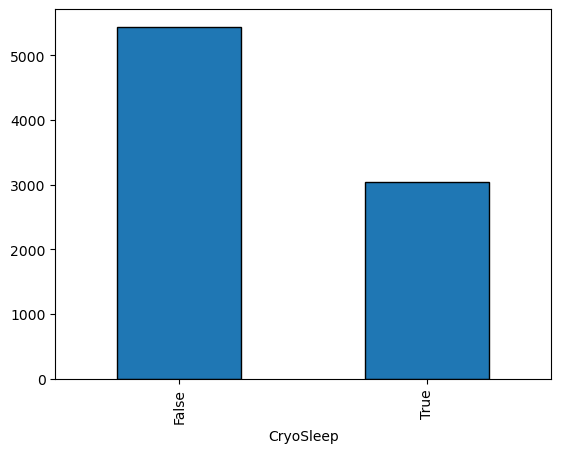

In [29]:
#Bar plot for CryoSleep column
df['CryoSleep'].value_counts().plot(kind='bar',edgecolor="black")

<Axes: xlabel='Destination'>

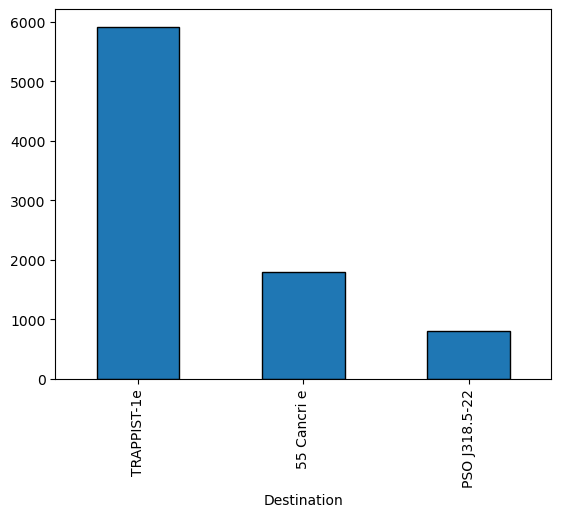

In [31]:
#Bar plot for Destination column
df['Destination'].value_counts().plot(kind='bar',edgecolor="black")

<Axes: xlabel='VIP'>

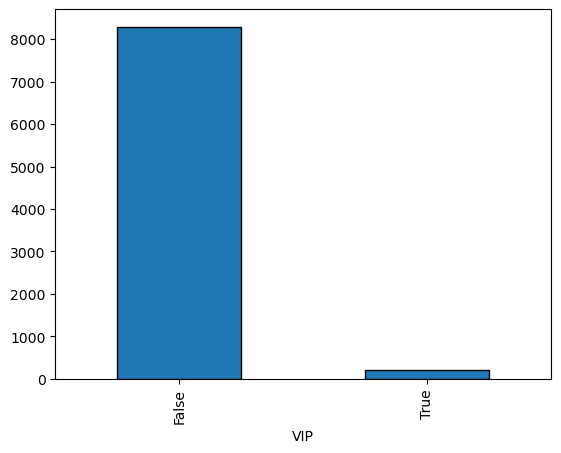

In [33]:
#Bar plot for VIP column
df['VIP'].value_counts().plot(kind='bar',edgecolor="black")

<Axes: xlabel='CabinDeck'>

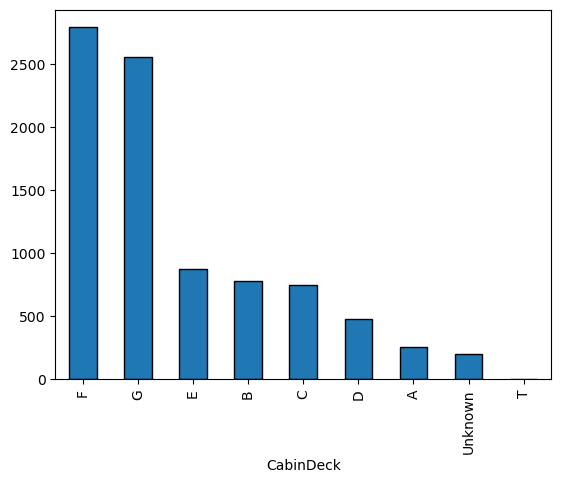

In [35]:
#Bar plot for CabinDeck column
df['CabinDeck'].value_counts().plot(kind='bar',edgecolor="black")

<Axes: ylabel='Frequency'>

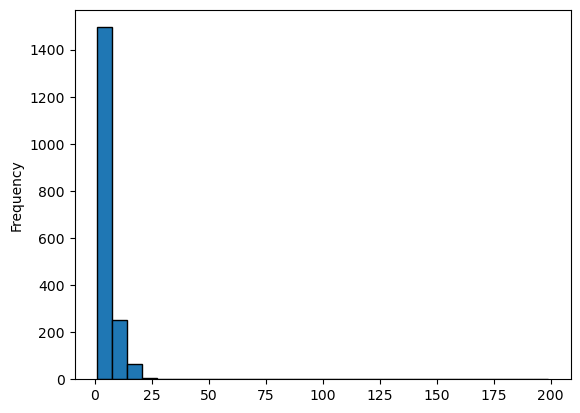

In [37]:
#Bar plot for CabinNum column
df["CabinNum"].value_counts().plot.hist(bins=30, edgecolor="black")

<Axes: xlabel='CabinSide'>

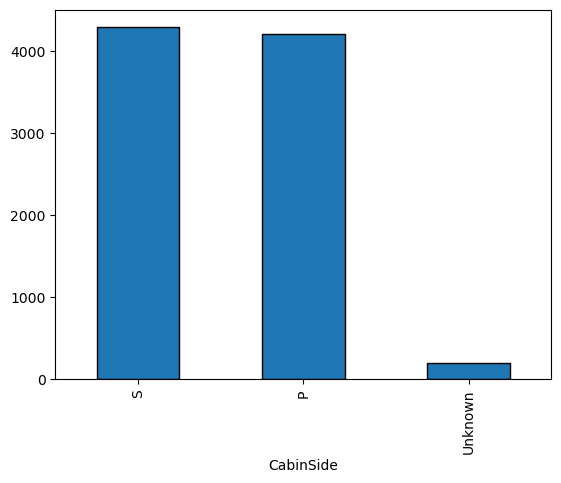

In [40]:
#Bar plot for CabinSide column
df['CabinSide'].value_counts().plot(kind='bar',edgecolor="black")

<Axes: xlabel='AgeBinned'>

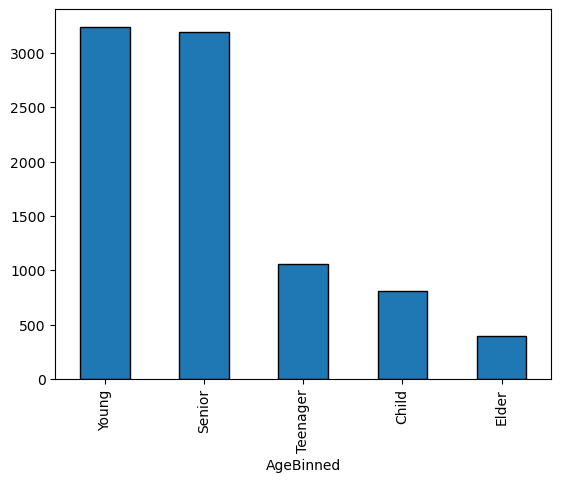

In [46]:
#Bar plot for AgeBinned column
df['AgeBinned'].value_counts().plot(kind='bar',edgecolor="black")

In [83]:
#Scattermatrix plot of all numerical columns
fig = px.scatter_matrix(df,dimensions=df.select_dtypes(include='number'),color="Transported")
fig.update_traces(diagonal_visible=False)
fig.update_layout(
    font=dict(
        family="Courier New, monospace",
        size=5,  
        color="Black"
    )
)

fig.show()

In [86]:
#Pivot table for HomePlanet column compared to Transported(target) column
pivot = df.groupby(["HomePlanet","Transported"])["Transported"].count().unstack()
pivot

Transported,False,True
HomePlanet,,
Earth,2651,1951
Europa,727,1404
Mars,839,920


<Axes: xlabel='HomePlanet'>

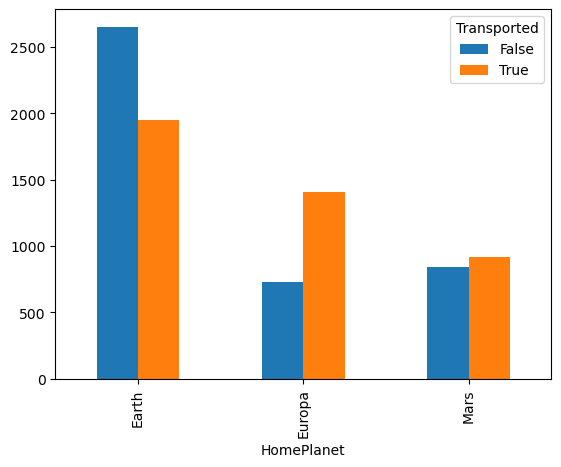

In [87]:
#Bar plot of pivot table
pivot.plot.bar()

In [88]:
#Pivot table for CryoSleep column compared to Transported(target) column
pivot = df.groupby(["CryoSleep","Transported"])["Transported"].count().unstack()
pivot

Transported,False,True
CryoSleep,,
False,3650,1789
True,554,2483


<Axes: xlabel='CryoSleep'>

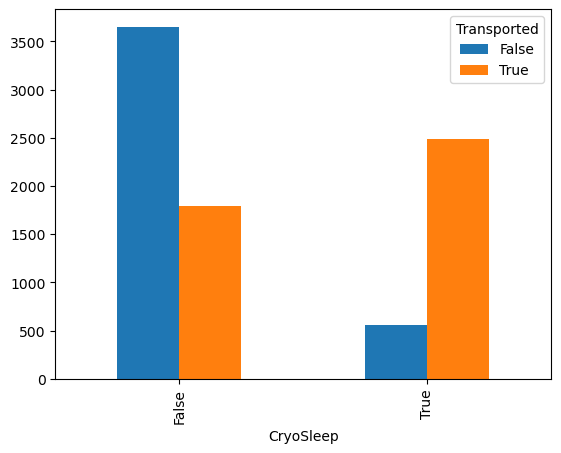

In [89]:
#Bar plot of pivot table
pivot.plot.bar()

In [90]:
#Pivot table for Destination column compared to Transported(target) column
pivot = df.groupby(["Destination","Transported"])["Transported"].count().unstack()
pivot

Transported,False,True
Destination,,
55 Cancri e,702,1098
PSO J318.5-22,395,401
TRAPPIST-1e,3128,2787


<Axes: xlabel='Destination'>

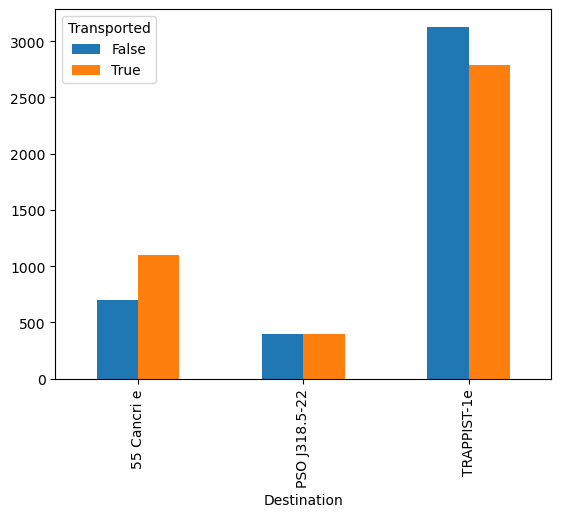

In [91]:
#Bar plot of pivot table
pivot.plot.bar()

In [92]:
#Pivot table for VIP column compared to Transported(target) column
pivot = df.groupby(["VIP","Transported"])["Transported"].count().unstack()
pivot

Transported,False,True
VIP,,
False,4093,4198
True,123,76


<Axes: xlabel='VIP'>

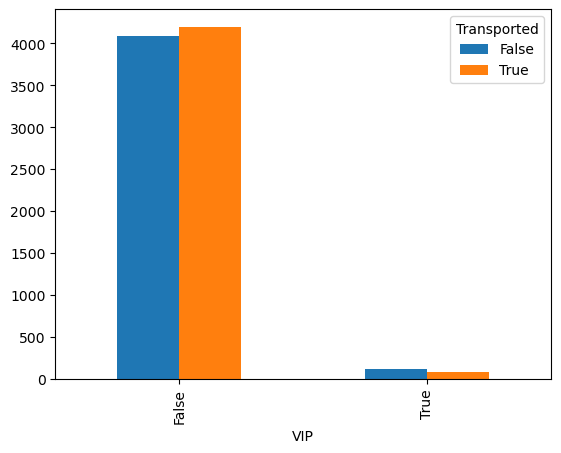

In [93]:
#Bar plot of pivot table
pivot.plot.bar()

In [94]:
#Pivot table for CabinDeck column compared to Transported(target) column
pivot = df.groupby(["CabinDeck","Transported"])["Transported"].count().unstack()
pivot

Transported,False,True
CabinDeck,,
A,129,127
B,207,572
C,239,508
D,271,207
E,563,313
F,1565,1229
G,1238,1321
T,4,1
Unknown,99,100


<Axes: xlabel='CabinDeck'>

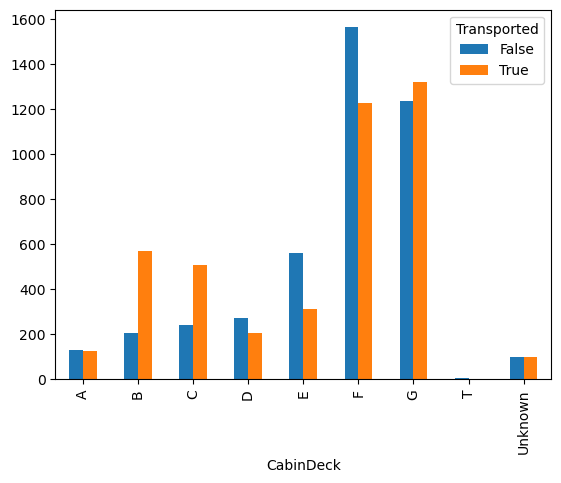

In [95]:
#Bar plot of pivot table
pivot.plot.bar()

In [96]:
#Pivot table for CabinNum column compared to Transported(target) column
pivot = df.groupby(["CabinNum","Transported"])["Transported"].count().unstack()
pivot

Transported,False,True
CabinNum,,
0,12.0,6.0
1,5.0,10.0
10,6.0,6.0
100,5.0,7.0
1000,3.0,3.0
...,...,...
996,NaN,1.0
997,2.0,NaN
998,3.0,1.0


<Axes: xlabel='CabinNum'>

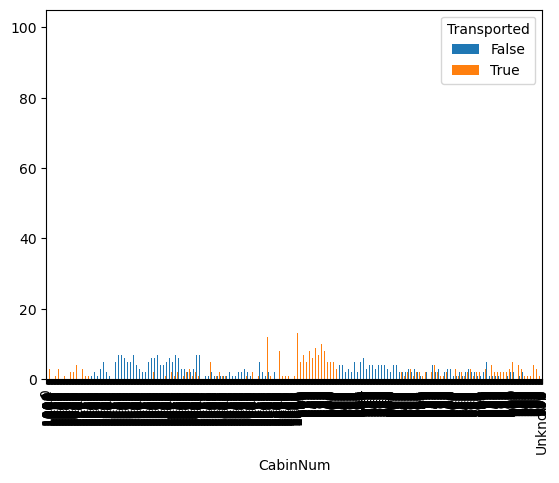

In [97]:
#Bar plot of pivot table
pivot.plot.bar()

In [98]:
#Pivot table for CabinSide column compared to Transported(target) column
pivot = df.groupby(["CabinSide","Transported"])["Transported"].count().unstack()
pivot

Transported,False,True
CabinSide,,
P,2308,1898
S,1908,2380
Unknown,99,100


<Axes: xlabel='CabinSide'>

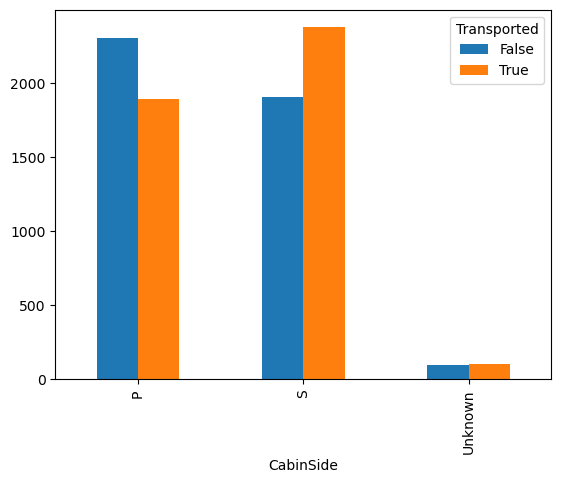

In [99]:
#Bar plot of pivot table
pivot.plot.bar()

In [100]:
#Pivot table for AgeBinned column compared to Transported(target) column
pivot = df.groupby(["AgeBinned","Transported"])["Transported"].count().unstack()
pivot

Transported,False,True
AgeBinned,,
Child,242,564
Elder,205,194
Senior,1656,1535
Teenager,490,569
Young,1722,1516


<Axes: xlabel='AgeBinned'>

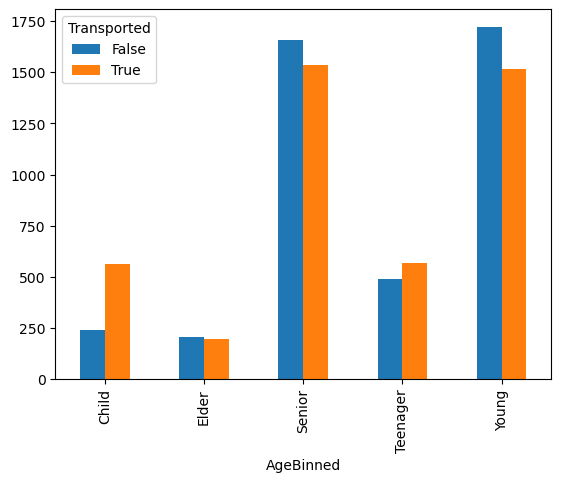

In [101]:
#Bar plot of pivot table
pivot.plot.bar()